6 Multilayer Neural Network Model
Design and train an Artificial Neural Network (ANN) to predict diabetes diagnosis using
medical data.
Dataset: Pima Indians Diabetes Dataset
Tasks:
1. Load dataset and define ANN model using Keras.
2. Use two hidden layers with ReLU activation and Sigmoid for the output layer.
3. Compile and fit the model with suitable optimizer, epochs, and batch size.
4. Evaluate performance for varying epochs and batch sizes.
5. Experiment with different activation functions.
6. Visualize the model using ANN Visualizer.

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/College/Navy Bays_pima-indians-diabetes.csv")

In [ ]:
df.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.isnull().sum()

,0
preg,0
plas,0
pres,0
skin,0
test,0
mass,0
pedi,0
age,0
class,0


In [ ]:
X=df.drop("class",axis=1)
y=df["class"]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model

In [ ]:
model=Sequential([
    Dense(16,input_dim=(X_train.shape[1]),activation="relu"),
    Dense(8,activation="relu"),
    Dense(1,activation="sigmoid")
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
history=model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit(X_train,y_train,epochs=50,batch_size=32,validation_data=(X_test,y_test),verbose=1)

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.4277 - loss: 0.7700 - val_accuracy: 0.4610 - val_loss: 0.7489
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5069 - loss: 0.7144 - val_accuracy: 0.5844 - val_loss: 0.6966
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5862 - loss: 0.6823 - val_accuracy: 0.6818 - val_loss: 0.6579
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6745 - loss: 0.6318 - val_accuracy: 0.7208 - val_loss: 0.6274
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6915 - loss: 0.6239 - val_accuracy: 0.7468 - val_loss: 0.6045
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7580 - loss: 0.5722 - val_accuracy: 0.7662 - val_loss: 0.5830
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7808 - loss: 0.5347 - val_accuracy: 0.7662 - val_loss: 0.5641
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7501 - loss: 0.5535 - val_accuracy: 0.7597 - v

In [21]:
loss,accuracy = model.evaluate(X_test , y_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7142 - loss: 0.5208 


In [24]:
import matplotlib.pyplot as plt

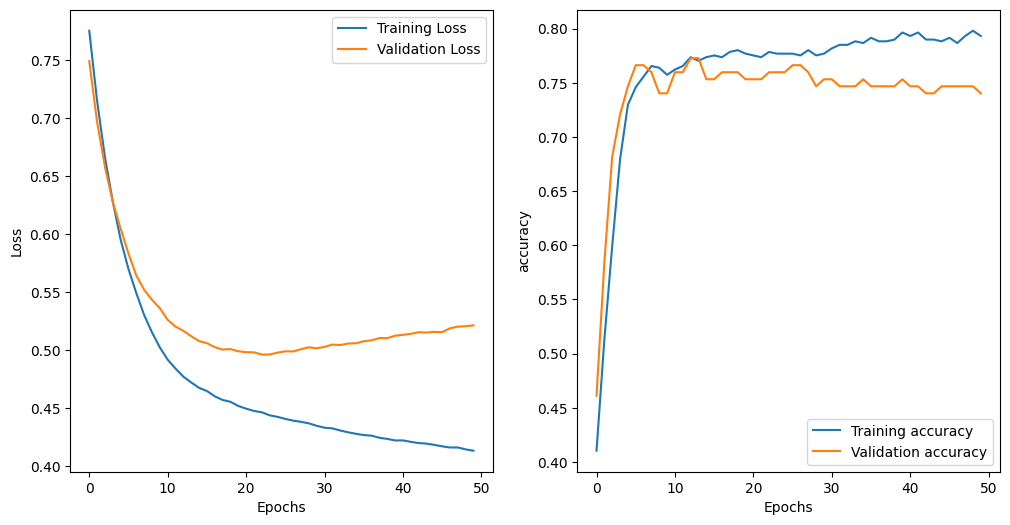

In [25]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],label='Training accuracy')
plt.plot(history.history['val_accuracy'],label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [26]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 869 (3.40 KB)

 Trainable params: 289 (1.13 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 580 (2.27 KB)

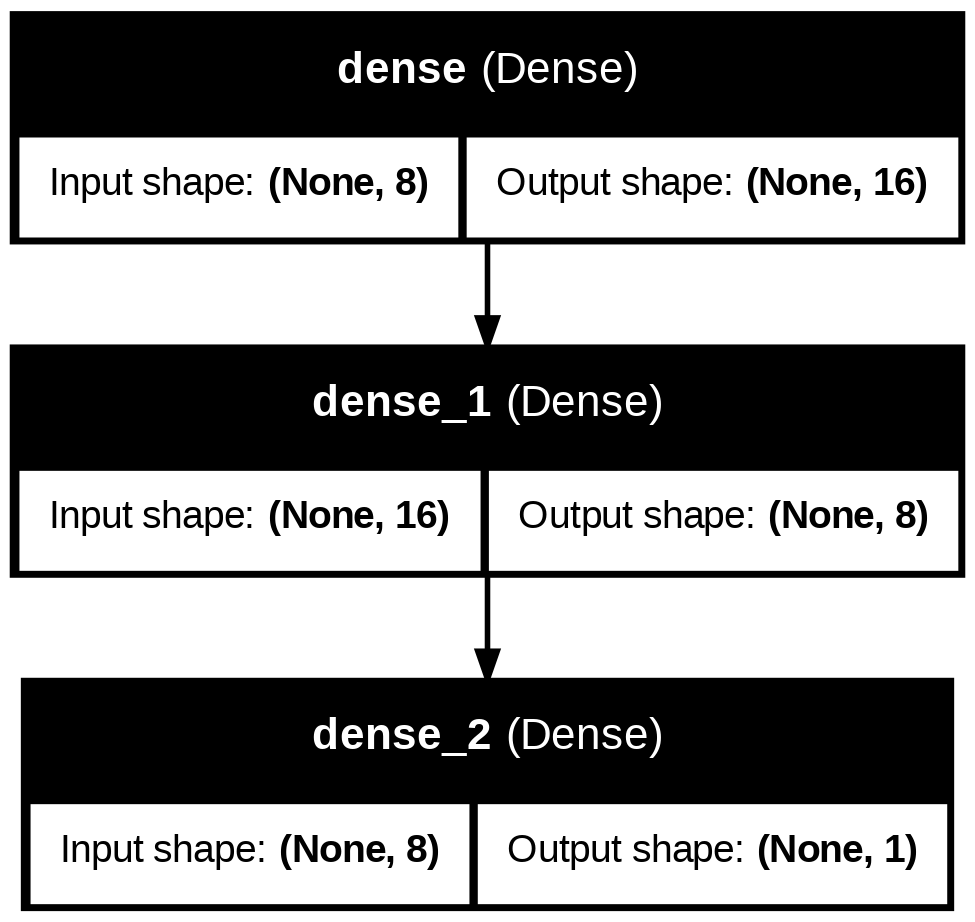

In [27]:
plot_model(model , show_shapes=True,show_layer_names=True)

**8 Multilayer Neural Network Model
Dataset: ANN_Bank_Marketing
a. Load the dataset in the program. Define the ANN Model with Keras.**

b. Define at least two hidden layers. Specify the ReLU function as activation function for
the hidden layer and Sigmoid for the output layer.

c. Compile the model with necessary parameters. Set the number of epochs and batch size
and fit the model.

d. Evaluate the performance of the model for different values of epochs and batch sizes.

e. Evaluate model performance using different activation functions Visualize the model
using ANN Visualizer.

In [39]:
df=pd.read_csv("/content/drive/MyDrive/College/ANN_Bank_Marketing.csv")

In [52]:
df.head()

,age,job,marital,education,default,balance,housing,loan,day_of_week,month,duration,campaign,pdays,previous,y
0,58,management,married,tertiary,no,2143,yes,no,5,may,261,1,-1,0,no
1,44,technician,single,secondary,no,29,yes,no,5,may,151,1,-1,0,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,76,1,-1,0,no
3,47,blue-collar,married,secondary,no,1506,yes,no,5,may,92,1,-1,0,no
4,33,blue-collar,single,secondary,no,1,no,no,5,may,198,1,-1,0,no


In [53]:
df.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
day_of_week,0
month,0


In [54]:
df.shape

(45211, 15)

In [43]:
df=df.drop(["poutcome","contact"],axis=1)

In [45]:
df['education'] = df['education'].fillna(df['education'].mode()[0])
df['job'].fillna(df['job'].mode()[0], inplace=True)

/tmp/ipython-input-324078711.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['job'].fillna(df['job'].mode()[0], inplace=True)


In [55]:
df.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
day_of_week,0
month,0


In [47]:
df.head()

,age,job,marital,education,default,balance,housing,loan,day_of_week,month,duration,campaign,pdays,previous,y
0,58,management,married,tertiary,no,2143,yes,no,5,may,261,1,-1,0,no
1,44,technician,single,secondary,no,29,yes,no,5,may,151,1,-1,0,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,76,1,-1,0,no
3,47,blue-collar,married,secondary,no,1506,yes,no,5,may,92,1,-1,0,no
4,33,blue-collar,single,secondary,no,1,no,no,5,may,198,1,-1,0,no


In [56]:
data = pd.get_dummies(df, drop_first=True,dtype=int)


In [57]:
data.head()

,age,balance,day_of_week,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,y_yes
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,33,2,5,76,1,-1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,47,1506,5,92,1,-1,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,33,1,5,198,1,-1,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [58]:
x=data.drop("y_yes",axis=1)
y=data["y_yes"]

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [60]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model

In [65]:
model1=Sequential([
    Dense(32,input_dim=X_train.shape[1],activation='relu'),
    Dense(16,activation='relu'),
    Dense(8,activation='relu'),
    Dense(1,activation='sigmoid'),
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [66]:
model1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [67]:
history=model1.fit(X_train,y_train,epochs=50,batch_size=32,validation_data=(X_test,y_test),verbose=1)

Epoch 1/50
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7510 - loss: 22.0313 - val_accuracy: 0.8635 - val_loss: 0.4056
Epoch 2/50
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.8705 - loss: 0.5559 - val_accuracy: 0.8368 - val_loss: 0.4265
Epoch 3/50
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8749 - loss: 0.4462 - val_accuracy: 0.8829 - val_loss: 0.4693
Epoch 4/50
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.8776 - loss: 0.4169 - val_accuracy: 0.8655 - val_loss: 0.6017
Epoch 5/50
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.8734 - loss: 0.4488 - val_accuracy: 0.8151 - val_loss: 0.5350
Epoch 6/50
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.8826 - loss: 0.3667 - val_accuracy: 0.8847 - val_loss: 0.3017
Epoch 7/50
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8790 - loss: 0.3336 - val_accuracy: 0.8865 - val_loss: 0.2885
Epoch 8/50
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.8813 - loss: 0.3433 

In [68]:
loss,accuracy=model1.evaluate(X_test,y_test)

283/283 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8879 - loss: 0.2438


In [69]:
pip install ann_visualizer graphviz


In [70]:
from ann_visualizer.visualize import ann_viz

ann_viz(model1, title="Bank Marketing ANN Model")


AttributeError: 'Dense' object has no attribute 'input_shape'

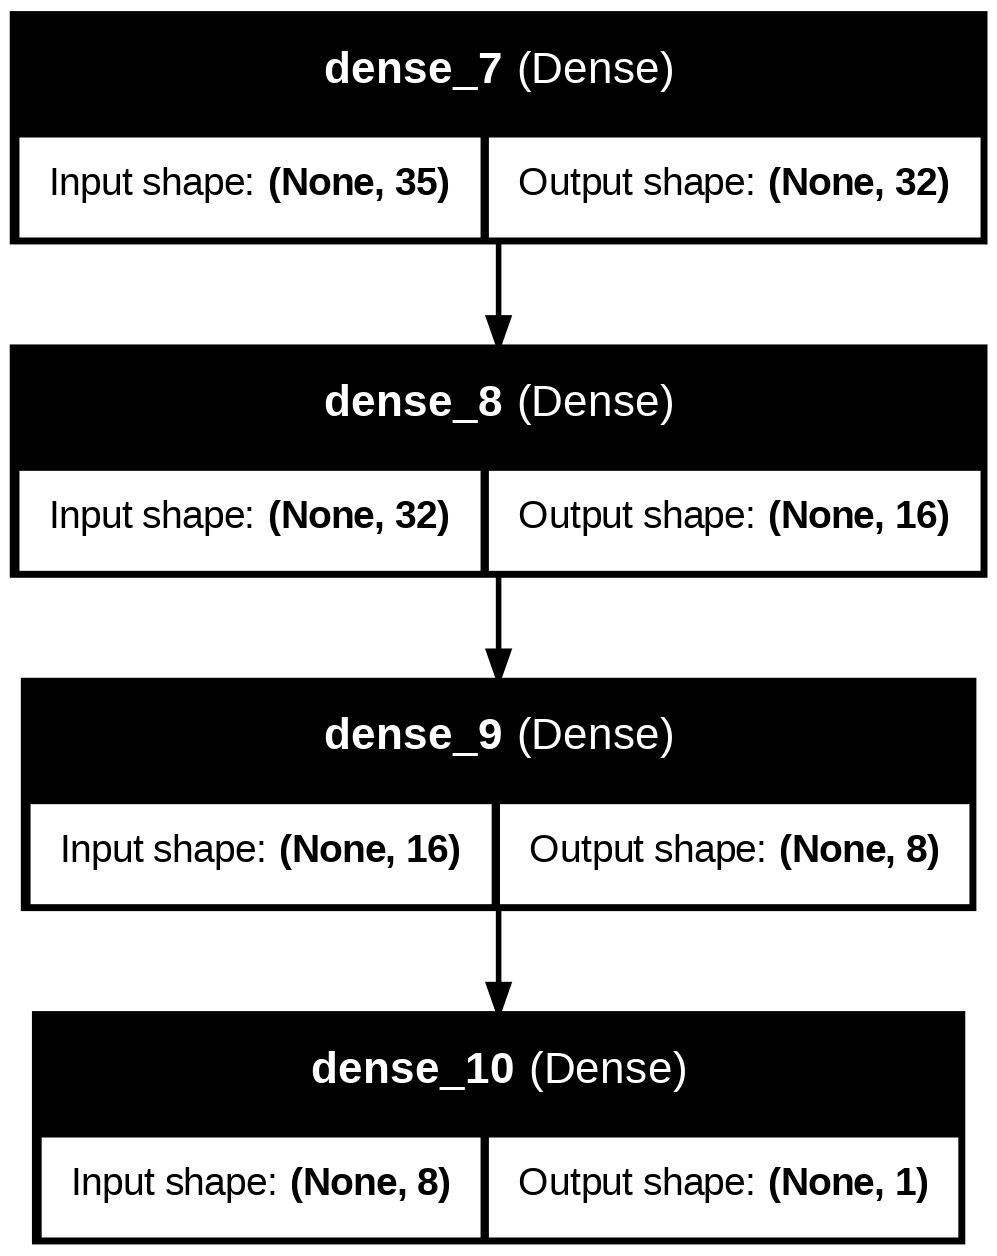

In [71]:
from tensorflow.keras.utils import plot_model

plot_model(model1, show_shapes=True, show_layer_names=True)